In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('zillow.csv')
df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52317 entries, 0 to 52316
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52317 non-null  int64  
 1   id                            52317 non-null  int64  
 2   parcelid                      52317 non-null  int64  
 3   bathroomcnt                   52317 non-null  float64
 4   bedroomcnt                    52317 non-null  float64
 5   calculatedbathnbr             52184 non-null  float64
 6   calculatedfinishedsquarefeet  52238 non-null  float64
 7   finishedsquarefeet12          52073 non-null  float64
 8   fips                          52317 non-null  float64
 9   fullbathcnt                   52184 non-null  float64
 10  latitude                      52317 non-null  float64
 11  longitude                     52317 non-null  float64
 12  lotsizesquarefeet             51953 non-null  float64
 13  p

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
pd.set_option('display.max_columns', None)

df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [6]:
def fix_fips(df):
    df['County'] = df.fips.map({6037:'Los Angeles County', 6059:'Orange County', 6111:'Ventura County'})
    return df

In [7]:
fix_fips(df)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,County
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential,Orange County
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential,Ventura County
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,Orange County
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Los Angeles County
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,2274245,12412492,2.0,4.0,2.0,1633.0,1633.0,6037.0,2.0,33870815.0,-118070858.0,4630.0,0100,261.0,6.037555e+07,30267.0,3101.0,96204.0,0.0,1962.0,125466.0,346534.0,2016.0,221068.0,4175.08,6.037555e+13,0.001082,2017-09-19,Single Family Residential,Los Angeles County
52313,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,0100,261.0,6.037101e+07,12447.0,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential,Los Angeles County
52314,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,1111,261.0,6.111008e+07,27110.0,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential,Ventura County
52315,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,0100,261.0,6.037434e+07,36502.0,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential,Los Angeles County


## Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

## Answer those questions through a mix of statistical tests and visualizations.

split the data and use train 

In [8]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  878910
validate observations:  376680
test observations:  313920


## question 1 to start it off - Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [9]:
train.shape, validate.shape, test.shape

((29297, 30), (12556, 30), (10464, 30))

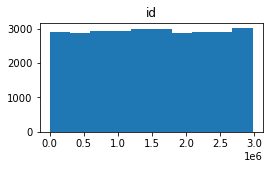

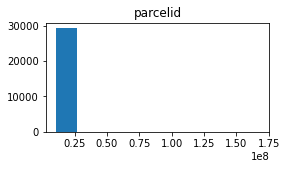

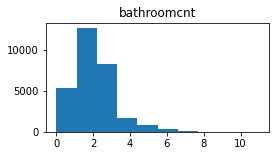

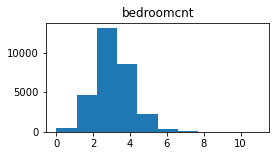

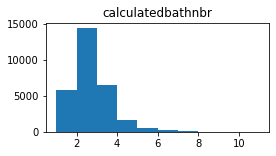

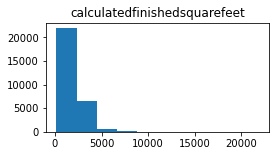

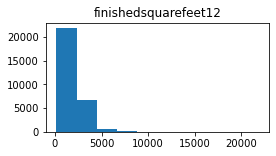

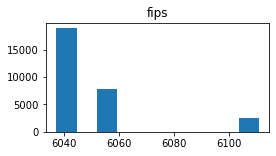

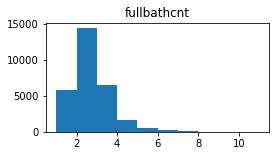

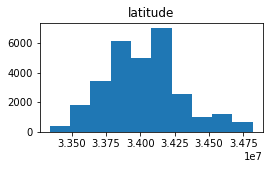

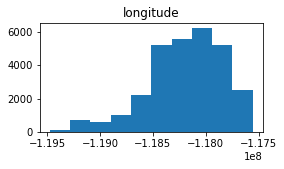

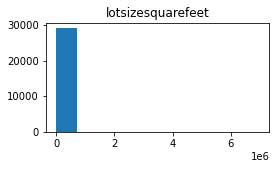

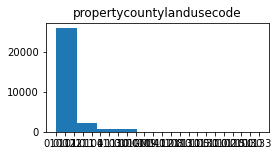

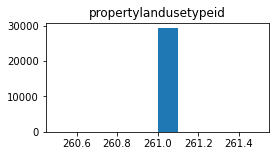

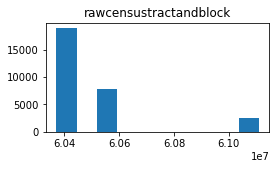

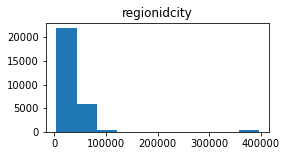

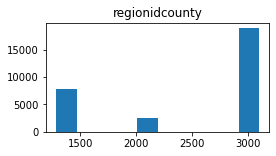

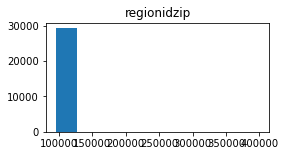

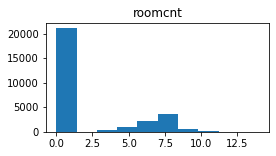

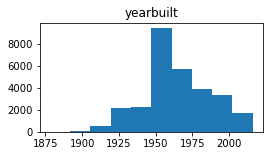

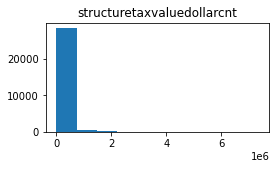

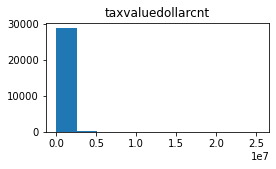

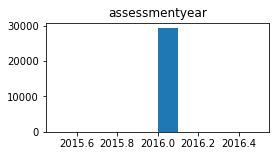

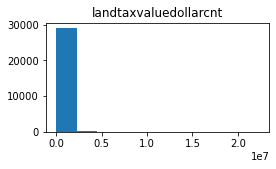

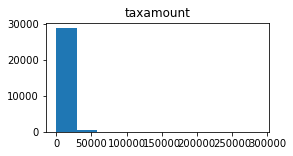

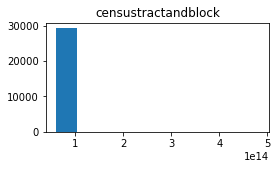

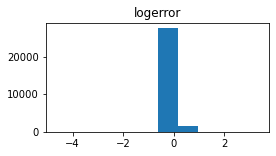

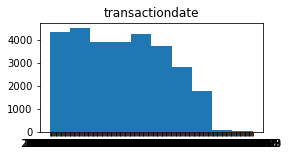

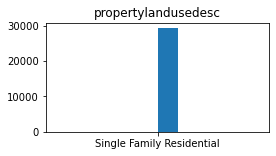

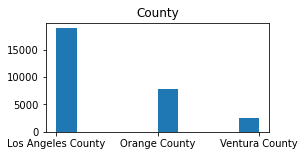

In [10]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [11]:
train.fips.value_counts()

6037.0    18933
6059.0     7911
6111.0     2453
Name: fips, dtype: int64

In [12]:
train.regionidzip.value_counts()

97319.0    415
97318.0    375
97329.0    328
97328.0    307
97118.0    287
          ... 
96434.0      1
96323.0      1
96148.0      1
95996.0      1
97092.0      1
Name: regionidzip, Length: 379, dtype: int64

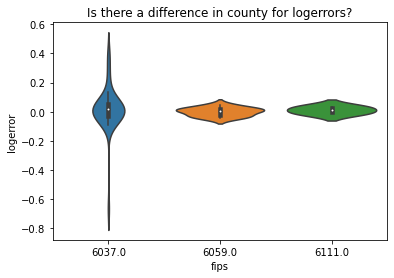

In [13]:

sample = train.sample(50)
sns.violinplot(sample.fips, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

In [ ]:
sample = train.sample(50)
sns.violinplot(sample.County, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

i keep running the violin plots but there is no concreet pattern here 

 ## question 2 is there a relationship with the number of baths and log error 

In [ ]:
sample = train.sample(500)
sns.barplot(sample.bathroomcnt, sample.logerror)
plt.title("Is there a difference in bathroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

In [ ]:
sample = train.sample(5000)
sns.barplot(sample.bathroomcnt, sample.logerror)
plt.title("Is there a difference in bathroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

takeaways- after running this a few times, there is a consistency with 8. bathroomcnt it alway was pretty high but idh vhave to run a stats test 

## Question 3 is there a relationship with the number of bedrromand log error 

In [ ]:
sample = train.sample(5000)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

In [ ]:
sample = train.sample(500)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

In [ ]:
sample = train.sample(50)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

## Question 4 what about log error and tax dollar count 

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
sample = train.sample(50)
sns.lmplot(x='taxvaluedollarcnt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

In [ ]:
sample = train.sample(500)
sns.lmplot(x='taxvaluedollarcnt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

In [ ]:
looks like for the log error looks about the same for the 

## Question 5 - what about year built and logerror 

In [ ]:
sample = train.sample(5000)
sns.lmplot(x='yearbuilt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

 - looks like towards the middel there is some sort of large cluster but noting to crazy. 

More exploration 

In [ ]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

In [ ]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

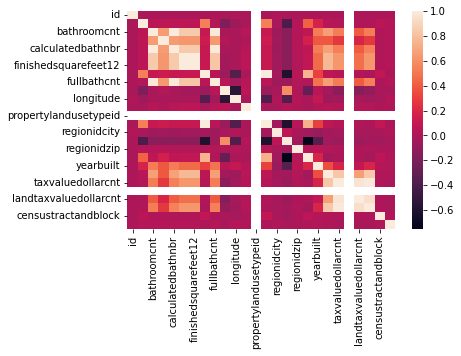

In [14]:
sns.heatmap(train.corr())
plt.show()

In [15]:
train.corr()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
id,1.000000,-0.008470,-0.002988,-0.007696,-0.002300,-0.002507,-0.002002,-0.009618,-0.002258,-0.004948,0.009787,-0.005479,NaN,-0.009619,0.003435,-0.000656,-0.003886,-0.009624,0.000474,0.001039,0.000678,NaN,0.000371,-0.001305,-0.005454,-0.001547
parcelid,-0.008470,1.000000,0.057003,0.068368,0.058837,0.057656,0.058476,0.535524,0.019181,-0.182222,-0.051950,-0.014457,NaN,0.535130,-0.024158,-0.396345,0.032449,0.424915,0.173778,0.040729,0.020558,NaN,0.008175,0.009201,0.055248,0.024075
bathroomcnt,-0.002988,0.057003,1.000000,0.649585,1.000000,0.847713,0.847660,0.106916,0.985398,-0.010600,-0.003959,0.037279,NaN,0.106920,-0.056592,-0.139590,0.023794,0.073943,0.526640,0.654115,0.522655,NaN,0.396379,0.526089,0.007346,0.028531
bedroomcnt,-0.007696,0.068368,0.649585,1.000000,0.645107,0.629753,0.629166,0.125938,0.637008,0.021768,-0.009459,0.013439,NaN,0.126473,-0.048379,-0.127953,0.026065,0.165149,0.385438,0.385759,0.270049,NaN,0.181218,0.272934,0.015024,0.026190
calculatedbathnbr,-0.002300,0.058837,1.000000,0.645107,1.000000,0.849386,0.849291,0.110574,0.985398,-0.011608,-0.004722,0.040708,NaN,0.110575,-0.057489,-0.142942,0.023963,0.072013,0.527410,0.668874,0.534384,NaN,0.405743,0.538318,0.007568,0.028807
calculatedfinishedsquarefeet,-0.002507,0.057656,0.847713,0.629753,0.849386,1.000000,1.000000,0.109145,0.828834,-0.037184,-0.007062,0.058451,NaN,0.108914,-0.050648,-0.136313,0.023112,0.078963,0.458093,0.772320,0.618864,NaN,0.470846,0.621816,0.006436,0.033410
finishedsquarefeet12,-0.002002,0.058476,0.847660,0.629166,0.849291,1.000000,1.000000,0.110343,0.828673,-0.039454,-0.005532,0.058332,NaN,0.110094,-0.050568,-0.140243,0.023255,0.080180,0.457478,0.773634,0.620869,NaN,0.473325,0.623520,0.006515,0.033072
fips,-0.009618,0.535524,0.106916,0.125938,0.110574,0.109145,0.110343,1.000000,0.048339,-0.071532,-0.362835,-0.004494,NaN,0.999937,-0.043379,-0.604500,0.038667,0.740624,0.298141,0.066789,0.028481,NaN,0.006248,0.002390,0.080692,0.001925
fullbathcnt,-0.002258,0.019181,0.985398,0.637008,0.985398,0.828834,0.828673,0.048339,1.000000,0.039543,-0.032315,0.043095,NaN,0.048684,-0.054683,-0.057331,0.020051,0.015681,0.482533,0.654806,0.523898,NaN,0.398291,0.531155,0.002712,0.026429
latitude,-0.004948,-0.182222,-0.010600,0.021768,-0.011608,-0.037184,-0.039454,-0.071532,0.039543,1.000000,-0.546310,0.062503,NaN,-0.065625,-0.018224,0.589111,0.012192,-0.284903,0.046821,-0.031377,-0.127225,NaN,-0.158746,-0.094239,-0.008905,-0.019384
